# 9.Transformadas Especiales

El análisis de señales realizado hasta el momento, hace uso de la transformada de Fourier y sus diferentes variantes y transformadas relacionadas, como la transformada z. Sin embargo, la transformada de Fourier no es la única transformada que se puede emplear en procesamiento digital de señales, existiendo otras transformadas que se basan en el principio del **espacio de señales**. Por esta razón este capítulo inicia con el estudio del espacio de señales que es la base para las transformadas especiales descritas en secciones posteriores: la DCT, la STFT, y la transformada Wavelet. 

## 9.1. Espacio de Señales

### 9.1.1. Espacios vectoriales

Las señales pueden considerarse como si fueran entidades vectoriales. Por tal razón, resulta interesante revisar algunos conceptos básicos de vectores. Recordemos que cualquier vector $\mathbf{r}$ en el espacio 3D se puede representar por medio de la combinación lineal de los vectores unitarios ($\widehat{u}_{x}$, $\widehat{u}_{y}$, $\widehat{u}_{z}$) que forman la base del espacio. Generalizando para cualquier espacio n-dimensional, un vector se puede reconstruir si se conocen las componentes $r_{k}$ y los vectores unitarios $\widehat{u}_{k}$:

$$\mathbf{r}=\sum_{k=1}^{n}r_{k}\widehat{u}_{k}$$

Estos vectores unitarios deben ser ortogonales entre sí, lo cual se verifica si el producto punto o producto escalar entre ellos es cero para un par de vectores unitarios diferentes, y es uno si se trata del mismo vector. Lo anterior se expresa matemáticamente:

$$\widehat{u}_{k}\bullet\widehat{u}_{l}=\delta_{kl}$$

donde $\delta_{kl}$ se denomina delta de Kronecker y está definida como:

$$\delta_{kl}=\left\{ \begin{array}{c}
0\\
1
\end{array}\,\,\,\begin{array}{c}
k\neq l\\
k=l
\end{array}\right.$$

La ecuación anterior se denomina habitualmente **condición de ortogonalidad**. El **producto punto** o **producto interno** se define como:

$$\mathbf{a}\bullet\mathbf{b}=\sum_{k=1}^{n}a_{k}b_{k}$$

y tiene interesantes propiedades, tales como el cálculo de la norma de un vector:

$$\left\Vert \mathbf{a}\right\Vert =\sqrt{\mathbf{a}\bullet\mathbf{a}}=\sqrt{\sum_{k=1}^{n}a_{k}^{2}}$$

y la determinación de cada uno de los coeficientes $r_{k}$ de la ecuación de reconstrucción:

$$r_{k}=\mathbf{r}\bullet\widehat{u}_{k}$$

con lo cual, podemos reescribir la ecuación de reconstrucción como:

$$\mathbf{r}=\sum_{k=1}^{n}(\mathbf{r}\bullet\widehat{u}_{k})\widehat{u}_{k}$$

### 9.1.2. Señales como vectores

Para considerar una señal como un vector, diremos que una señal se puede descomponer en un conjunto infinito de señales fundamentales, ortogonales entre sí, y las cuales forman la base de un **espacio de señales**, es decir, las señales fundamentales $\Psi_{k}(t)$ tienen el mismo significado físico de los vectores unitarios. Así que, para obtener las expresiones equivalentes a las ecuaciones reconstrucción, condición de ortogonalidad y cálculo de las componentes para el caso de una señal, es necesario definir la operación **producto interno** de funciones. El espacio de señales generalmente se denomina _espacio de Hilbert_, y se define como un espacio vectorial completo en el cual el producto interno está definido.

Para una señal continua, el producto punto se transforma en:

$$\left\langle u(t),v(t)\right\rangle =\int_{a}^{b}u(t)v^{*}(t)dt$$

donde el intervalo de integración $[a,b]$ se toma en la región donde $u(t)$ y $v(t)$ son ortogonales. Esta expresión se conoce con el nombre de **producto interno** y conserva las mismas propiedades del producto punto. Puesto que las señales $u(t)$ y $v(t)$ pueden ser complejas, se toma el complejo conjugado de $v(t)$ en el producto interno, con el fin de que el cuadrado de la norma de una función sea exactamente igual a la energía de la señal en el intervalo $[a,b]$:

$$\left\Vert u(t)\right\Vert ^{2}=\left\langle u(t),u(t)\right\rangle =\int_{a}^{b}u(t)u^{*}(t)dt=\int_{a}^{b}\left|u(t)\right|^{2}dt$$

Si $\Psi_{k}(t)$ son las señales fundamentales que forman el espacio, la expresión equivalente a la **ecuación de reconstrucción** de una señal será:

$$x(t)=\sum_{k=-\infty}^{\infty}c_{k}\Psi_{k}(t)$$

Esta ecuación significa que una señal $x(t)$ se puede descomponer como la sumatoria infinita de señales fundamentales $\Psi_{k}(t)$ escaladas por un factor $c_{k}$, el cual se determina mediante una ecuación equivalente al **cálculo de los coeficientes**:

$$c_{k}=\frac{1}{\alpha_{k}}\left\langle x(t),\Psi_{k}(t)\right\rangle =\frac{1}{\alpha_{k}}\int_{a}^{b}x(t)\Psi_{k}^{*}(t)dt$$

Naturalmente, las funciones $\Psi_{k}(t)$ deben ser ortogonales entre sí, lo cual se verifica mediante la **condición de ortogonalidad** para señales:

$$\left\langle \Psi_{k}(t),\Psi_{l}(t)\right\rangle =\int_{a}^{b}\Psi_{k}(t)\Psi_{l}^{*}(t)dt=\alpha_{k}\,\delta_{kl}$$

y la constante $\alpha_{k}$, denominada factor de normalización, el cual se ha incluido porque la norma de las funciones $\Psi_{k}(t)$ no necesariamente tiene que ser unitaria. Finalmente, reuniendo estas ecuaciones se tiene que:

$$x(t)=\sum_{k=-\infty}^{\infty}\frac{1}{\alpha_{k}}\left\langle x(t),\Psi_{k}(t)\right\rangle \Psi_{k}(t)$$

Como se verá en las siguientes secciones, el tipo más común de señales fundamentales son las exponenciales complejas, lo que nos conduce a la serie de Fourier y la transformada de Fourier. Sin embargo, otro tipo de señales fundamentales muy usadas para el análisis de señales, son las **onditas** o **wavelets**, y por tanto, las ecuaciones de reconstrucción y  cálculo de los coeficientes describen una generalización de las transformadas como se mostrará en las siguiente secciones.

### 9.1.3. Serie de Fourier, DFT y Transformadas 2D

Para ver la utilidad de la definición del producto interno y sus relaciones con las transformadas veamos como deducir la serie de Fourier a partir de esta representación. Recordemos que la serie de Fourier permite interpretar cualquier señal periódica como la suma infinita de señales exponenciales complejas armónicas de la frecuencia fundamental. En la notación de espacio de señales, estas señales base $\Psi_{k}(t)$ serán entonces:

$$\Psi_{k}(t)=\exp(j\omega_{0}kt)$$

donde $\omega_{0}=\frac{2\pi}{T_{0}}$ es la frecuencia angular fundamental de la señal $x(t)$ a descomponer. Usando las ecuaciones generales de reconstrucción y cálculo de los coeficientes de la sección anterior se obtiene la descripción matemática de la serie de Fourier 

$$x(t)=\sum_{k=-\infty}^{\infty}c_{k}\exp(j\omega_{0}kt)$$

y el cálculo de cada uno de los coeficientes $c_{k}$ está dado por

$$c_{k}=\frac{1}{\alpha_{k}}\left\langle x(t),\exp(j\omega_{0}kt\right\rangle =\frac{1}{T_{0}}\int_{a}^{a+T_{0}}x(t)\exp(-j\omega_{0}kt)dt$$

el término $1/T_{0}$ se ha incluido en el cálculo de los coeficientes $c_{k}$ debido a que al aplicar la condición de ortogonalidad entre un par de funciones exponenciales complejas armónicas, el factor de normalización $\alpha_{k}$ es justo $T_{0}$. Puede notarse que el intervalo de integración para determinar $c_{k}$ corresponde al período fundamental $T_{0}$ de la señal $x(t)$, sin importar el origen del punto de cálculo.

Ahora, como nos interesa estudiar las señales discretas. Debemos recordar que la DFT se puede interpretar como una serie discreta de Fourier, en la cual el periodo de la señal es el número de datos $N$ de la DFT, de esta forma, la transformada directa está relacionada con los coeficientes $c_{k}$ y la inversa con $x(t)$, así que en tiempo discreto, cambiando las integrales por sumatorias y las frecuencias angulares $\omega=\omega_{0}k$ por frecuencias normalizadas $\Omega_{k}=2\pi\frac{k}{N}$, y el tiempo $t$ por $n$, obtenemos las relaciones para la DFT 

$$X[k]=\sum_{k=0}^{N}x[n]\exp\left(-j2\pi\frac{kn}{N}\right)$$

y su inversa

$$x[n]=\frac{1}{N}\sum_{k=0}^{N}X[k]\exp\left(j2\pi\frac{kn}{N}\right)$$

Este cambio del tiempo continuo al discreto es aplicable a cualquier base de funciones $\Psi_{k}$. Normalmente se acostumbra también repartir el término $\frac{1}{N}$ que aparece al normalizar las funciones $\Psi_{k}$ entre ambas expresiones como $\frac{1}{\sqrt{N}}$. Rápidamente, se puede notar que para el caso de la DFT y la IDFT, las funciones base del espacio de señales son 

$$\Psi_{k}[n]=\frac{1}{\sqrt{N}}\exp\left(j2\pi\frac{kn}{N}\right)=\frac{1}{\sqrt{N}}W_{N}^{-kn}$$

ya que 

$$X[k]=DFT\{x[n]\}=\left\langle x[n],\frac{1}{\sqrt{N}}W_{N}^{-kn}\right\rangle =\frac{1}{\sqrt{N}}\sum_{n=0}^{N-1}x[n]W_{N}^{kn}$$

Debe recordarse que el término $W_{N}$ fue definido en el Capítulo 7 como

$$W_{N}=\exp\left(-j\frac{2\pi}{N}\right)$$

De las expresiones anteriores se deriva que la DFT se puede representar en notación vectorial como el producto de una matriz de transformación $\mathbf{W}_{N}$ por el vector columna de la señal de entrada:

$$\mathbf{X}_{k}=\mathbf{W}_{N}\mathbf{x}_{n}$$

donde la matriz de transformación $\mathbf{W}_{N}$ tiene la forma

$$\mathbf{W}_{N}=\frac{1}{\sqrt{N}}\left[\begin{array}{ccccc}
1 & 1 & 1 & ... & 1\\
1 & W_{N} & W_{N}^{2} & ... & W_{N}^{N-1}\\
1 & W_{N}^{2} & W_{N}^{4} & ... & W_{N}^{2(N-1)}\\
: & : & : & : & :\\
1 & W_{N}^{N-1} & W_{N}^{2(N-1)} & ... & W_{N}^{(N-1)(N-1)}
\end{array}\right]$$

Lo interesante de la notación vectorial es que es aplicable a cualquier transformación en la que se emplee un conjunto de funciones ortonormales $\Psi_{k}$. En general, es posible expresar estas transformadas en forma vectorial como:

_Transformación Directa_:
$$\mathbf{X}_{k}=\boldsymbol{\Psi}_{N}\mathbf{x}_{n}$$

_Transformación Inversa_:
$$\mathbf{x}_{n}=\left(\boldsymbol{\Psi}_{N}\right)^{-1}\mathbf{X}_{k}=\left(\boldsymbol{\Psi}_{N}^{T}\right)^{*}\mathbf{X}_{k}$$

para las cuales, la matriz de transformación debe formarse con los elementos:

$$\boldsymbol{\Psi}_{N}=\left\{ \Psi_{kn}^{*}\right\}$$ 

Podemos notar que la inversa de la matriz $\boldsymbol{\Psi}_{N}$ debe ser la compleja conjugada de su transpuesta, o lo que es lo mismo, su matriz adjunta. Cuando las matrices cumplen esta propiedad se dice que son ortogonales. Este hecho era de esperarse, ya que partimos de la suposición de formar $\boldsymbol{\Psi}_{N}$ a partir de un conjunto de funciones ortogonales.

Resumiendo, cualquier transformada en tiempo discreto la podemos expresar como el producto de una matriz de transformación por un vector/matriz correspondiente a la señal de entrada. Esta matriz se forma evaluando las funciones base $\Psi_{k}$ para varios instantes de tiempo n desde $n=0$ hasta $N$, donde $N$ es el tamaño de la señal que debe corresponder al tamaño de la matriz de transformación. Para el caso de la transformada directa, las filas de la matriz de transformación son el índice $k$ de la función base y para las columnas se emplea el instante de tiempo $n$.

Para finalizar, se mostrará cómo se pueden extender las transformadas a dos dimensiones, es decir, para calcular la transformada de una imagen, $\mathbf{X}$. En estos casos, el cálculo de la transformada se realiza en dos pasos. En el primer paso, se calculan las transformadas de cada columna, creando una matriz intermedia a la denotaremos como $\mathbf{Y}_{I}$. Posteriormente, se calculan las transformadas de cada fila de la matriz intermedia $\mathbf{Y}_{I}$, dando como resultado la transformada 2D, $\mathbf{Y}_{2D}$. 

El anterior procedimiento, en notación vectorial es el siguiente:

$$\mathbf{Y}_{I}	=	\boldsymbol{\Psi}_{N}X$$
$$\mathbf{Y}_{2D}	=	\boldsymbol{\Psi}_{N}\mathbf{Y}_{I}^{T}=\boldsymbol{\Psi}_{N}\left(\boldsymbol{\Psi}_{N}\mathbf{X}\right)^{T}$$

donde la operación transpuesta se introduce para calcular la transformada sobre las filas de $\mathbf{Y}_{I}$ en lugar de sus columnas. Con la notación anterior, si $\boldsymbol{\Psi}_{N}$ corresponde a $\mathbf{W}_{N}$, se obtiene la transformada de Fourier 2D, y si se emplea en lugar de la notación vectorial, la FFT para calcular las transformadas de las filas y columnas, se obtiene el algoritmo denominado **FFT2D**, cuya interpretación fue descrito con mayor profundidad en el Capítulo 7, Sección 7.4.

Las definiciones vectoriales de las transformadas 2D se pueden extender a otras funciones base, como es el caso de la DCT aplicada a imágenes, que se explicará en la próxima sección, y es una pieza fundamental en los algoritmos de compresión de imágenes JPEG.

## 9.2. Transformada Discreta del Coseno (DCT)

La DFT tiene la desventaja de ser una transformación que implica operaciones con números complejos, proporcionando información sobre la magnitud y la fase. En gran parte de aplicaciones prácticas, el análisis de la magnitud es más relevante que el de la fase, y se prefiere descartar este tipo de información. Por tal razón, es deseable emplear para ciertas aplicaciones una transformada que proporcione únicamente información sobre la magnitud y brinde la posibilidad de ser completamente real, con el fin de reducir considerablemente el número de cálculos. Existen muchas transformadas que ofrecen estas ventajas, entre ellas, la más sobresaliente es la **Transformada Discreta del Coseno** o abreviadamente **DCT** por sus siglas en inglés _Discrete Cosine Transform_. 

Esta transformada se encuentra en aplicaciones de compresión de señales, principalmente en el sistema de compresión de imágenes JPEG, el cual subdivide la imagen en recuadros de 8x8 pixels a los cuales les aplica una DCT-II. El éxito de esta transformada para la realización de estas aplicaciones radica en que su espectro en frecuencia permite determinar el contenido energético de las señales, así que al eliminar las componentes de baja energía, se garantiza la formación de una trama redundante de ceros, la cual se puede comprimir eficientemente con algún algoritmo de compresión sin pérdidas como el Huffman o el Lempel-Ziv. Las técnicas de compresión basadas en DCT o en cualquier otro tipo de transformadas se denominan _compresión con pérdidas_, en cuanto a que eliminan información poco importante, permitiendo altos grados de compresión (10:1 o superiores), pero deteriorando la calidad de la señal recuperada, la cual nunca será idéntica a la señal original, solamente será una aproximación. 

Para ilustrar este principio, en el siguiente ejemplo se emplea el comando ``dct`` de la biblioteca ``scipy.fft`` para calcular la DCT, truncar a cero todos los elementos menores a un umbral que el 5% del valor máximo de la DCT, y finalmente comparar la señal original con la señal reconstruida con la DCT inversa (``idct``).

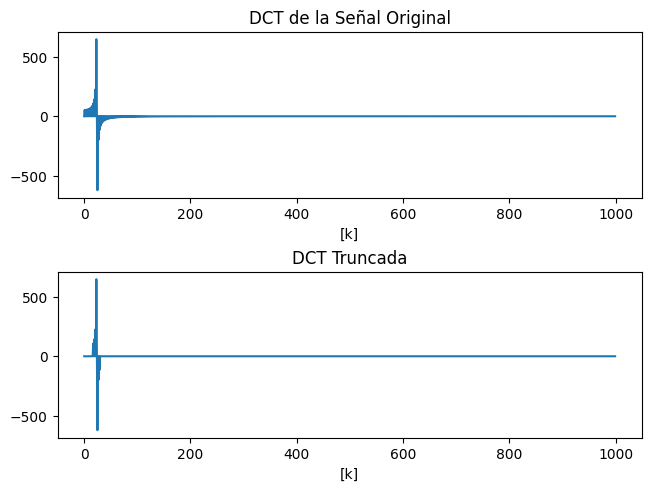

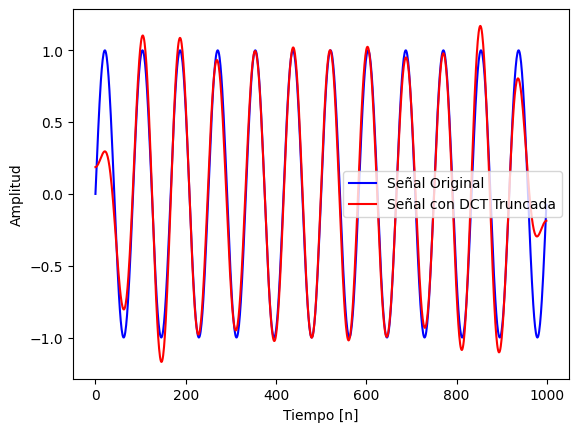

In [1]:
# Ejemplo 9.1 Cálculo de la DCT a una señal unidimensional y 
#   efecto de truncamiento sobre el espectro de la DCT
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dct, idct

#Crea una señal senoidal
n = np.arange(0,1000)
x = np.sin(2*np.pi*0.012*n)

#DCT Tipo 2 de la señal senoidal
x_dct = dct(x)

#Eliminación de las componentes de más baja energía en la DCT
max = np.max(np.abs(x_dct))
threshold = max * 0.15  # 5% de la máxima amplitud
x_dct_trunc = np.where(np.abs(x_dct)<threshold, 0, x_dct)
x_trunc = idct(x_dct_trunc)

#Grafica DCTs y compara las señales en el tiempo
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(x_dct)
axs[0].set_xlabel('[k]')
axs[0].set_title('DCT de la Señal Original')
axs[1].plot(x_dct_trunc)
axs[1].set_xlabel('[k]')
axs[1].set_title('DCT Truncada')
plt.show()

fig, axs = plt.subplots()
axs.plot(x,'b-',label='Señal Original')
axs.plot(x_trunc,'r-',label='Señal con DCT Truncada')
axs.set_xlabel('Tiempo [n]')
axs.set_ylabel('Amplitud')
axs.legend()
plt.show()

Nótese que la DCT da un valor real al cual no es necesario calcularle la magnitud como era el caso de la FFT. La DCT de una señal senoidal exhibe unos picos agudos de baja frecuencia y unos picos casi imperceptibles a alta frecuencia, por lo cual, si los valores de DCT inferiores al 5% del valor máximo de la señal se truncan a cero, la IDCT inversa de este nuevo conjunto de datos da muy cercano a la señal original, distorsionándola únicamente en los extremos de la señal como se muestra en la última figura de la simulación.

Existen 8 tipo de transformadas DCT, 4 para una longitud del tamaño de datos par y otras 4 para los impares. En este texto solamente estudiaremos las pares. Para ellas, las funciones base se tratan de funciones coseno, cuyas formas son:

_DCT-I_:
$$\Psi_{kn}=\sqrt{\frac{2}{N}}\left[c_{k}c_{n}cos\left(\frac{kn\pi}{N}\right)\right]\,\,\,\,\,\,n,k=0...N$$

_DCT-II_:
$$\Psi_{kn}=\sqrt{\frac{2}{N}}\left[c_{k}cos\left(\frac{k(n+\frac{1}{2})\pi}{N}\right)\right]\,\,\,\,\,\,n,k=0...N-1$$

_DCT-III_:
$$\Psi_{kn}=\sqrt{\frac{2}{N}}\left[c_{n}cos\left(\frac{(k+\frac{1}{2})n\pi}{N}\right)\right]\,\,\,\,\,\,n,k=0...N-1$$

_DCT-IV_:
$$\Psi_{kn}=\sqrt{\frac{2}{N}}\left[c_{n}cos\left(\frac{(k+\frac{1}{2})(n+\frac{1}{2})\pi}{N}\right)\right]\,\,\,\,\,\,n,k=0...N-1$$

donde 

$$c_{l}=\left\{ \begin{array}{c}
\frac{1}{\sqrt{2}}\\
1
\end{array}\,\,\begin{array}{c}
si\,l\,\bmod\,N=0\\
si\,l\,\bmod\,N\neq0
\end{array}\right.$$

Es interesante anotar que la matriz de transformación DCT-I es la única de las 4 que posee un tamaño de $(N+1)\times(N+1)$, las demás tienen tamaños de $N\times N$. Además, las matrices de transformación inversas para la DCT-I y DCT-IV son ellas mismas (transformaciones unitarias) y la inversa de la DCT-II es la DCT-III y viceversa.

Python soporta estas cuatro representaciones de la DCT a través de un segundo parámetro a la función ``dct`` llamado ``type`` que toma los valores 1, 2, 3 o 4. En el siguiente ejemplo se calcula la DCT-III:

``x_dct = dct(x, type=3)``

La función ``dct`` calcula por defecto la DCT tipo II.

### 9.2.1. DCT en comprensión de imágenes

Como se indicó al inicio de la sección, la principal aplicación del DCT es la compresión de imágenes. El principio consiste en dividir la imagen de entrada en recuadros de 8x8 pixeles y a cada recuadro se le calcula la DCT-II empleando la misma notación usada para transformadas en 2D

$$\mathbf{Y}_{DCT2D} =	\boldsymbol{\Psi}_{N}\left(\boldsymbol{\Psi}_{N}\mathbf{X}\right)^{T}$$

es decir, calcular primero la DCT a las columnas y luego a las filas. Finalmente, para lograr la compresión, a cada matriz de la DCT se le aplica un proceso de cuantización como el mostrado en la siguiente figura.

![DCT en compresión de imágenes](../img/cap9_dct_compresion.png)

Note que el elemento de la DCT ubicado en la posición (0,0) es el que recibe un mayor número de bits de cuantización, al igual que sus vecinos, mientras que los elementos más cercanos a la esquina (7,7) no reciben bits de cuantización, es decir, se aplica un proceso de truncamiento como el mostrado para una señal unidimensional. Esto se debe a que la DCT-II aplicada a una imagen concentra la información alrededor de la esquina superior izquierda, lo cual permite ignorar los elementos que aportan menos información y conseguir tasas de compresión muy altas.  

### 9.2.2. Cálculo eficiente de la DCT

Para finalizar, vale la pena aclarar que existen algoritmos rápidos para calcular las DCTs, sin embargo, éstos no serán abordados en este documento. Adicionalmente, la DCT-II, la cual es la que se emplea en la mayoría de las aplicaciones, se puede calcular a partir del algoritmo de la FFT, ya que la relación entre $\Psi_{kn}^{DCT-II}$ y $W_{N}$ es

$$\Psi_{kn}^{DCT-II}=\sqrt{\frac{2}{N}}\left[c_{k}cos\left(\frac{k(n+\frac{1}{2})\pi}{N}\right)\right]=c_{k}\sqrt{\frac{2}{N}}\mathcal{R}e\{W_{2N}^{k(n+\frac{1}{2})}\}$$

que reemplazados en el cálculo de la DCT nos conducen a

$$DCT-II\left\{ x[n]\right\} =c_{k}\sqrt{\frac{2}{N}}\mathcal{R}e\left\{ W_{2N}^{k/2}\sum_{n=0}^{2N-1}x[n]W_{2N}^{2k}\right\}$$

lo que indica que la DCT-II se puede calcular sacando la parte real de una FFT de $2N$ puntos, pero hay que hacer un truco, como $x[n]$ debe ser el doble de su largo original, se intercalan ceros entre las muestras de la señal original y de la FFT calculada se eliminan los últimos $N$ datos.

#### Para Reflexionar

* En el Ejemplo 9.1 se mostró que después de truncar los datos entregados por la DCT a una señal unidmensional es posible obtener una versión aproximada de la señal. Aplique este principio para construir un algoritmo de denoising, orientado a bloques, similar al mostrado con la FFT en el Capítulo 8.

* ¿Qué tasa de compresión se puede obtener con la cuantización de bits para la DCT de una imagen mostrada en la Sección 9.2.1?

* ¿Cómo codificaría en Python el algoritmo de compresión de imágenes mostrado en la Sección 9.2.1?

* Aplique el procedimiento de cálculo de la DCT usando FFT descrito en la Sección 9.2.2.

## 9.3. Transformada de Fourier de Tiempo Corto (STFT)

La transformada rápida de Fourier solamente permite obtener una descripción magnitud-frecuencia o fase-frecuencia de la señal, ya que asume que el espectro de la señal es invariante con el tiempo y se comporta siempre de esa forma para todos los instantes de tiempo desde $-\infty$ hasta $\infty$. 

Sin embargo, la gran mayoría de las señales de la naturaleza exhiben cambios de frecuencia con el tiempo. Un caso típico es una obra musical, en ella durante ciertos instantes de tiempo, los músicos están ejecutando algunas notas musicales de cierta frecuencia y posteriormente cambian a otras notas, es decir, el espectro de frecuencia de una composición musical varía con el tiempo. A este tipo de señales se les conoce con el nombre de **señales no estacionarias**. 

Si se realiza la transformada de Fourier a una obra musical completa, muy probablemente, el espectro mostrará las componentes de frecuencia correspondientes a todas las notas tocadas durante la ejecución de la melodía, pero sería imposible saber en que instante de tiempo sonó una determinada nota o instrumento. Estas deficiencias son las que permite solucionar la **Transformada de Fourier de Tiempo Corto** o **STFT**, por sus siglas en inglés _Short-Time Fourier Transform_, la cual permite una descripción frecuencia-tiempo de la señal. 

El principio en que se basa la STFT consiste en desplazar una ventana de longitud finita sobre la señal (por ejemplo una Hamming), ubicándola a diferentes desplazamientos de tiempo $T$, de tal forma que sirva para truncar la señal y calcular el espectro de cada segmento en particular de la señal. Esta transformada brinda una información **frecuencia-tiempo** que indica como evolucionan las componentes de frecuencia de la señal en el tiempo. Por tal motivo, para su representación se usan gráficas 3D o mapas de colores, denominadas **espectrogramas**, en los cuales la intensidad representa la magnitud del espectro como se muestra en el siguiente ejemplo.

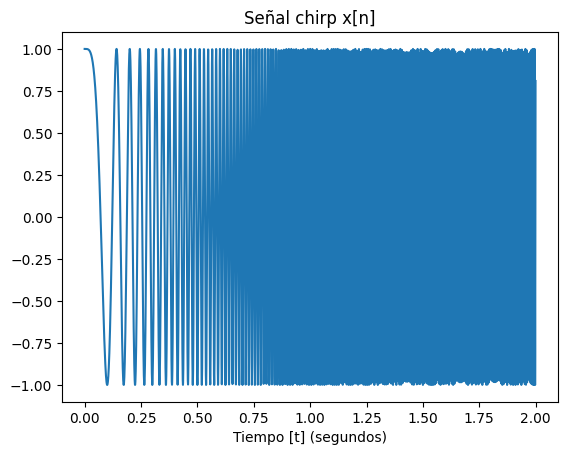

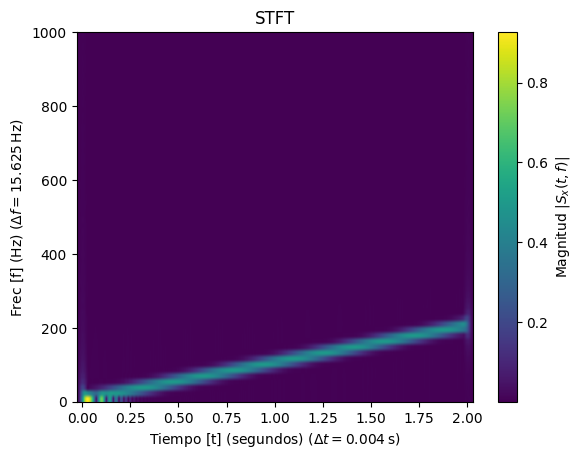

In [2]:
# Ejemplo 9.2 Cálculo de la STFT
#
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Crea una señal chirp que varía de 0 a 200Hz en 2 segundos
fs=2000     #Define una frecuencia de muestreo de 2kHz
Ts=1/fs
t = Ts*np.arange(0,2*fs)  # Genera un vector de tiempos, de 0 a 2 segundos
x = sig.chirp(t,0,2,200)

# Grafica la señal chirp
fig, axs = plt.subplots()
axs.plot(t,x)
axs.set_title("Señal chirp x[n]")
axs.set(xlabel="Tiempo [t] (segundos)")
plt.show()

# Calcula STFT usando ventana hamming
N = 128
SFT = sig.ShortTimeFFT(np.hamming(128), hop=8, fs=1/Ts, mfft=128, scale_to='magnitude')
Sx = SFT.stft(x) 

# Grafica STFT
fig, axs = plt.subplots()
axs.set_title("STFT")
axs.set(xlabel=rf"Tiempo [t] (segundos) ($\Delta t = {SFT.delta_t}\,$s)",
        ylabel=rf"Frec [f] (Hz) ($\Delta f = {SFT.delta_f}\,$Hz)")
im1 = axs.imshow(abs(Sx), origin='lower', aspect='auto',extent=SFT.extent(len(x)), cmap='viridis')
axs.set(ylim=(0,1000))
fig.colorbar(im1, label="Magnitud $|S_x(t, f)|$")
plt.show()

En el ejemplo anterior se muestra el gráfico de una señal chirp en el tiempo. Esta señal corresponde a una senoidal que cambia de frecuencia con el tiempo. Para el caso particular del ejemplo, la señal varía su frecuencia linealmente desde 0Hz, en t=0 segundos, hasta 200Hz, en t=2 segundos. Esta señal fue muestreada con una f_{s}=2kHz y se calculó su STFT usando una ventana de Hamming y una FFT de 128 datos, cuyos resultados se muestran en la figura inferior. En el espectro de la STFT aparece un máximo de intensidad que se mueve desde frecuencias cero, en t=0s, hasta 200Hz, en t=2segundos, como era de esperarse. Este gráfico muestra las capacidades de la STFT para el análisis de señales cuyo contenido frecuencial varía con el tiempo.

Nótese que el comando ``ShortTimeFFT`` empleado para la calcular la STFT recibe como parámetros:

``ShortTimeFFT(ventana, hop, fs, mfft, scale_to='magnitude')``

El primer parámetro es un vector con la ventana empleada para particionar la señal de entrada, en el ejemplo se empleó una ventana hamming usando ``np.hamming(128)``. 

El segundo parámetro ``hop`` indica el número de muestras en el tiempo que se desplazan para calcular el siguiente segmento. Este parámetro está relacionado con la resolución en el tiempo. Si se requiere una alta resolución en el tiempo, se deben escoger desplazamientos pequeños que permitan traslapar datos entre cada uno de los segmentos truncados, es decir,

$$\Delta t = \mathsf{hop} \times T_{s}$$

El tercer parámetro, ``fs`` es la frecuencia de muestreo, y el cuarto, ``mfft`` la longitud de la FFT. En el ejemplo se usó el mismo tamaño de la ventana, pero se puede establecer un valor mayor para aumentar la resolución en frecuencia, empleando la estrategia de _zero-padding_ (completar con ceros) que fue descrita en el Capítulo 7. Se debe recordar que la resolución en frecuencia de la FFT está dada por

$$\Delta f = \frac{f_{s}}{\mathsf{mfft}}$$

El último parámetro se usa para hacer una normalización en los datos entregados para efectos de graficación.

Matemáticamente, la STFT se define como:

$$STFT(\omega,T)=\left\langle x(t)\,,\,\exp(j\omega t)w(t-T)\right\rangle$$

donde $w(t-T)$ representa la ventana desplazada hasta el instante de tiempo $T$. 

Esta ecuación puede verse como un conjunto de transformadas de Fourier analizadas a segmentos de la señal que inician en instantes de tiempo $T$ y que tienen una longitud igual al tamaño de la ventana. De hecho, en el espectrograma mostrado en el ejemplo anterior cada columna de la imagen resultante es la magnitud de la FFT de cada segmento de la señal. 

Aunque la STFT permite obtener una representación frecuencia-tiempo de la señal, existe un límite de precisión y resolución para esta descripción debido a que la STFT emplea una ventana de longitud fija. Para ilustrar este efecto, tomemos como ejemplo la señal mostrada en la siguiente figura. 

![Problemas de la STFT](../img/cap9_stft_problem.png)

Cuando la ventana está ubicada en el instante de tiempo $T=0$, la STFT puede determinar con precisión la frecuencia de la señal presente en este segmento, dado a que la longitud de la ventana abarca más de un período completo (figura de la izquierda), sin embargo, cuando la ventana se ubica en $T=T_{1}$, no se logra abarcar un período completo, y por ende no es posible determinar con precisión el contenido de frecuencia de este segmento de tiempo (figura de la derecha). En pocas palabras, la STFT puede resolver con buena resolución el contenido de altas frecuencias pero es incapaz de hacerlo para regiones que involucren frecuencias más bajas de lo que permita la longitud de la ventana, es así como, para un análisis de mejor resolución frecuencia-tiempo, se prefiere emplear un tipo de transformada que presente una longitud variable de la ventana, tal es el caso de la Transformada Wavelet que se describe en la siguiente sección.

#### Para Reflexionar

* ¿Cómo utilizaría la STFT para extraer la partitura musical de una composición musical de un único instrumento? Ayuda: Sustituya en el ejemplo el código que calcula la señal chirp por la carga del archivo ``cancion2_sin_ruido.wav`` disponible en la carpeta ``res`` de esta manera, y aumente el tamaño de los segmentos y la FFT de la STFT a 2048.

```Python
from scipy.io import wavfile
fs, x = wavfile.read('res/cancion2_sin_ruido.wav')
Ts = 1/fs
t = np.arange(0,len(x))*Ts
```

* Suponga que se cuenta con una grabación musical digitalizada a una frecuencia de muestreo de 22050Hz, y dicha grabación fue para un único instrumento que genera frecuencias en las octavas 2 y 3. ¿Qué parámetros de la STFT emplearía para extraer las notas musicales de dicha canción? Es decir, determine la ventana, longitud de la ventana, longitud de la FFT, desplazamiento de cada segmento, entre otros parámetros requeridos para la FFT. Ayuda: Consulte una tabla de las frecuencias de las notas musicales.  

## 9.4. Transformada Wavelet

En la sección anterior se mostró la incapacidad para la resolución de las bajas frecuencias de la STFT, debido a que ésta emplea una ventana de longitud fija, y se propuso entonces, el uso de una transformada que involucre ventanas de longitud variable como lo es la **Transformada Wavelet**.

Al igual que la STFT, la Transformada Wavelet permite obtener un análisis de la señal en el dominio de la frecuencia-tiempo, sin embargo, a diferencia de ésta, el conjunto de funciones base con las cuales se analiza el espectro de la señal no se tratan de exponenciales complejas sino de una función especial denominada wavelet madre u ondita. 

La transformada Wavelet se define como:

$$\mathcal{W}g(s,T)=\left\langle x(t)\,,\,\frac{1}{\sqrt{s}}g\left(\frac{t-T}{s}\right)\right\rangle$$

y significa que el valor de la transformada wavelet en un punto particular $(s,T)$ se obtiene a partir del producto interno entre la señal y wavelet madre $g(t)$ desplazada hasta el instante de tiempo $T$ y escalada por un factor $s$. Este factor de escala indica que tan comprimida o expandida en el tiempo está la señal madre. Como este escalamiento es el inverso de la frecuencia, un valor elevado de $s$ tiene por significado una baja frecuencia y viceversa.

La wavelet madre debe cumplir ciertos requisitos especiales como son: 

* ser una señal de energía, es decir debe estar contenida en una región de tiempo
* tener media cero
* oscilar alrededor del cero

Aunque dichas funciones deben cumplir también la condición de ortogonalidad, existen ciertas wavelet madre que no exhiben dicha condición, y por ende, solamente se utilizan para el análisis de señales, y no para la reconstrucción. 

Se han propuesto gran variedad de wavelets madre para el análisis de señales, la selección de alguna en particular depende del tipo de señal a analizar, incluso se pueden construir a partir de métodos computacionales como los **Filtros de Espejo en Cuadratura** (_QMF_) que se explican en el Capítulo 11. Esto brinda la flexibilidad de analizar una señal empleando una función madre que sea muy parecida a la forma de la señal a analizar. 

En el siguiente ejemplo se muestran las formas de onda de 4 tipos de wavelet madre disponibles en Python en el paquete ``pywavelets`` que debe ser instalado usando el comando

``pip install pywavelets``

Puede observarse como la Daubechies II tiene una curiosa forma que se asemeja bastante al patrón de una señal real de voz, así que el análisis con wavelets usando esta función madre, permitirá una interpretación más precisa acerca de la relaciones frecuencia-tiempo. 

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


Text(0.5, 1.0, 'Sombrero Mexicano')

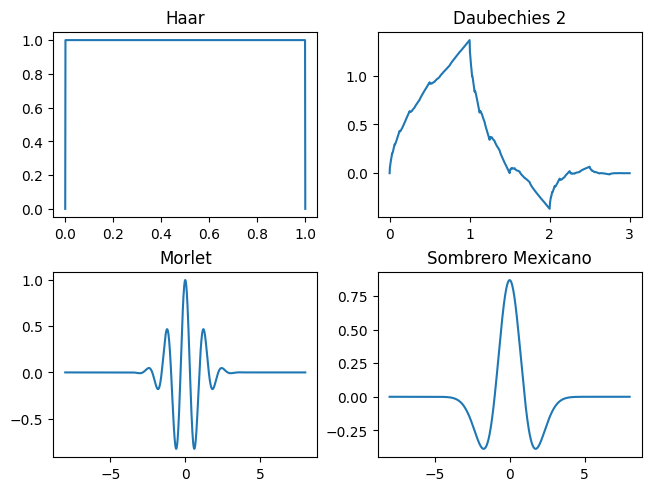

In [4]:
# Ejemplo 9.3. Grafica de 4 wavelet madre disponibles en Python
#
import matplotlib.pyplot as plt
import pywt

# Muestra el listado de familias disponibles en PyWavelets
print(pywt.families())

# Obtiene las funciones madre
w_haar = pywt.Wavelet('haar')
w_db2  = pywt.Wavelet('db2')
w_morl = pywt.ContinuousWavelet('morl')
w_mexh = pywt.ContinuousWavelet('mexh')

# Grafica la forma de las funciones madre usando wavefun
fig, axs = plt.subplots(2,2,layout='constrained')

[phi, psi, x] = w_haar.wavefun(level=10)
axs[0,0].plot(x,phi)
axs[0,0].set_title("Haar")

[phi, psi, x] = w_db2.wavefun(level=10)
axs[0,1].plot(x,phi)
axs[0,1].set_title("Daubechies 2")

[phi, x] = w_morl.wavefun(level=10)
axs[1,0].plot(x,phi)
axs[1,0].set_title("Morlet")

[phi, x] = w_mexh.wavefun(level=10)
axs[1,1].plot(x,phi)
axs[1,1].set_title('Sombrero Mexicano')

Cabe mencionar que la Transformada Wavelet está definida para versiones: en tiempo continuo (**Transformada Wavelet Continua** o **CWT**) y discreto  (**Transformada Wavelet Discreta** o **DWT**). Para éste último tipo, se cuenta con una **Transformada Rápida Wavelet** (**FWT**), denominada **algoritmo de Mallat**, el cual está basado en técnicas de procesamiento digital de tasa múltiple que será discutido en el Capítulo 12. 

No todas las funciones wavelet madre están disponibles para la CWT y DWT. Nótese del ejemplo anterior que las funciones wavelet madre Morlet y Sombrero Mexicano fueron creadas con el objeto ``pywt.ContinuousWavelet``, esto se debe a que estas funciones madre solamente son válidas para la CWT pero no se pueden usar en la DWT.

En el siguiente ejemplo se muestra como calcular la CWT a la señal chirp empleada en el ejemplo de la STFT usando las funciones wavelet madre Morlet y Sombrero Mexicano.

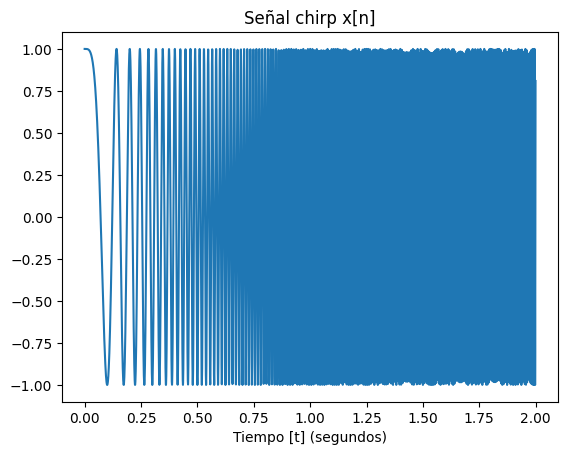

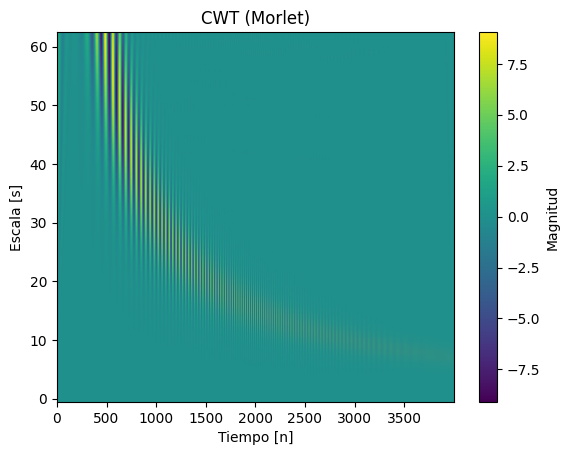

[1625.          812.5         541.66666667  406.25        325.
  270.83333333  232.14285714  203.125       180.55555556  162.5
  147.72727273  135.41666667  125.          116.07142857  108.33333333
  101.5625       95.58823529   90.27777778   85.52631579   81.25
   77.38095238   73.86363636   70.65217391   67.70833333   65.
   62.5          60.18518519   58.03571429   56.03448276   54.16666667
   52.41935484   50.78125      49.24242424   47.79411765   46.42857143
   45.13888889   43.91891892   42.76315789   41.66666667   40.625
   39.63414634   38.69047619   37.79069767   36.93181818   36.11111111
   35.32608696   34.57446809   33.85416667   33.16326531   32.5
   31.8627451    31.25         30.66037736   30.09259259   29.54545455
   29.01785714   28.50877193   28.01724138   27.54237288   27.08333333
   26.63934426   26.20967742   25.79365079]


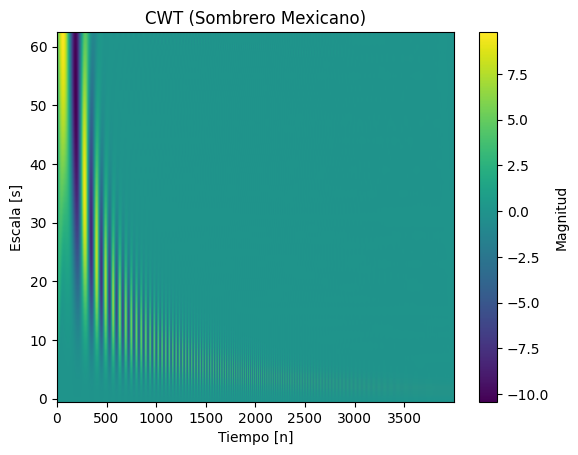

[500.         250.         166.66666667 125.         100.
  83.33333333  71.42857143  62.5         55.55555556  50.
  45.45454545  41.66666667  38.46153846  35.71428571  33.33333333
  31.25        29.41176471  27.77777778  26.31578947  25.
  23.80952381  22.72727273  21.73913043  20.83333333  20.
  19.23076923  18.51851852  17.85714286  17.24137931  16.66666667
  16.12903226  15.625       15.15151515  14.70588235  14.28571429
  13.88888889  13.51351351  13.15789474  12.82051282  12.5
  12.19512195  11.9047619   11.62790698  11.36363636  11.11111111
  10.86956522  10.63829787  10.41666667  10.20408163  10.
   9.80392157   9.61538462   9.43396226   9.25925926   9.09090909
   8.92857143   8.77192982   8.62068966   8.47457627   8.33333333
   8.19672131   8.06451613   7.93650794]


In [5]:
# Ejemplo 9.4 Cálculo de la transformada Wavelet Continua (CWT)
#
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pywt

# Crea una señal chirp que varía de 0 a 200Hz en 2 segundos
fs=2000     #Define una frecuencia de muestreo de 2kHz
Ts=1/fs
t = Ts*np.arange(0,2*fs)  # Genera un vector de tiempos, de 0 a 2 segundos
x = sig.chirp(t,0,2,200)

# Grafica la señal chirp
fig, axs = plt.subplots()
axs.plot(t,x)
axs.set_title("Señal chirp x[n]")
axs.set(xlabel="Tiempo [t] (segundos)")
plt.show()

# Función para graficar la CWT
def plotCWT(coef, caption):
    fig, axs = plt.subplots()
    axs.set_title(caption)
    axs.set(xlabel="Tiempo [n]", ylabel="Escala [s]");
    im1 = axs.imshow(coef, origin='lower', aspect='auto',cmap='viridis')
    fig.colorbar(im1, label="Magnitud")
    plt.show()

# Calcula la CWT usando la wavelet madre Morlet 
scales = np.arange(1,64)                    #Valores que tomará el parámetro s de la ecuación de la T. Wavelet
coef, freqs = pywt.cwt(x, scales, 'morl')   #Calcula la CWT
plotCWT(coef,"CWT (Morlet)")                #Grafica el espectrograma CWT

frequencies = pywt.scale2frequency('morl', scales)  #Retorna las frecuencias asociadas a cada escala 
print(frequencies*fs)

# Calcula la CWT usando la wavelet madre Sombrero Mexicano 
coef, freqs = pywt.cwt(x, scales, 'mexh')   #Calcula la CWT usando las mismas escalas de la CWT con Morlet
plotCWT(coef,"CWT (Sombrero Mexicano)")     #Grafica el espectrograma CWT

frequencies = pywt.scale2frequency('mexh', scales)  #Retorna las frecuencias asociadas a cada escala 
print(frequencies*fs)

Nótese del ejemplo anterior, que el máximo de intensidad se va desplazando de valores de alta escala a baja escala. Esto significa que la señal sufre un desplazamiento de baja frecuencia a alta frecuencia, ya que se debe recordar que la frecuencia y la escala son inversos. Igualmente, puede que al inicio de la señal, donde se ubicaban las frecuencias más bajas (escalas más altas) se aprecia una muy buena resolución, en cambio, conforme aumenta la frecuencuia (escalas más pequeñas), la CWT no entrega valores muy relevantes. Esto muestra las capacidades de la transformada Wavelet de resolver mejor las componentes de baja frecuencia.

A pesar de que para la señal chirp la frecuencia aumenta linealmente con el tiempo, como se evidenció con la STFT, en la transformada wavelet se aprecia un comportamiento no lineal. Esto se explica porque la relación entre la escala y la frecuencia no es lineal. De hecho, con la función ``pywt.scale2frequency`` se puede determinar las frecuencias relacionadas con cada escala, las cuales se muestran debajo de cada figura.

Nótese que para la función wavelet Morlet, las escalas 1 a 7 (primeros elementos del arreglo) están asociadas a frecuencias mayores a 200Hz, por ello, no se apreciada información en el espectrograma CWT para estas escalas. Para la wavelet Sombrero Mexicano, las escalas 1 y 2 tienen frecuencias asociadas superiores a 200Hz, de allí que para esta wavelet aparezca información para todas las escalas excepto las escalas 1 y 2.

Lo anterior se puede entender más fácil interpretando la transformada wavelet, para una cierta escala, como una correlación entre la señal de entrada y la función madre escalada y desplazada. Esto se puede apreciar más fácilmente reescribiendo su definición como: 

$$\mathcal{W}g(s,T)=\left\langle x(t)\,,\,\frac{1}{\sqrt{s}}g\left(\frac{t-T}{s}\right)\right\rangle =\int_{C}x(t)\frac{1}{\sqrt{s}}g\left(\frac{t-T}{s}\right)dt=x(T)\star\frac{1}{\sqrt{s}}g\left(-\frac{T}{s}\right)$$

lo que significa que la CWT se puede calcular como un banco de filtros, donde cada filtro tiene una respuesta al impulso que es la versión reflejada de la función wavelet madre $g(t)$, y escalada según el factor de escala $s$:

$$h_{s}(t) = \frac{1}{\sqrt{s}}g\left(-\frac{t}{s}\right)$$ 

De esta forma, la salida de cada uno de los filtros son los coeficientes para una escala específica $s$ como se muestra en la siguiente figura.

![Banco de filtros de la CWT](../img/cap9_cwt.png)

En otras palabras, cada fila que compone la imagen del espectrograma de la transforma wavelet es la salida de cada filtro en el banco de filtros.

Debe recordarse que en el Capítulo 8 se mostró que la correlación sirve para medir el grado de parecido de dos señales y se calcula como la convolución entre la señal de entrada y la versión reflejada de la señal a comparar. Nótese que esta definición coincide exactamente con la función que hace cada filtro en el banco de filtros CWT, por lo tanto, la información de cada escala no es más que una medida del grado de parecido de la señal de entrada con la versión escalada de la función wavelet madre. En la siguiente figura se muestra un ejemplo de cómo interpretar la CWT.

![Interpretación CWT](../img/cap9_cwt_interp.png)

Nótese que la función wavelet madre en la escala $s=1$ es la versión original, por lo que escalas más grandes, hacen que la función wavelet madre sea más ancha. En el instante de tiempo $\tau_{1}$, la función wavelet madre que más se parece a la señal original es la de la escala $s=3$, por ello el espectrograma lucirá más intenso en dicha escala. En el instante de tiempo $\tau_{2}$, la señal original se parece más a la wavelet madre en la escala $s=2$ y así sucesivamente. Por esta razón, la señal original $x(t)$ es la sumatoria de versiones escaladas y desplazadas de las funciones wavelet madre.

Finalmente, la representación en banco de filtros permite entender mejor al relación inversa entre la frecuencia y la escala. Dado que la información de cada escala es la salida de un filtro cuya respuesta al impulso es $h_{s}(\tau)$, la respuesta en frecuencia de cada filtro, es decir, la transformada de Fourier de cada función wavelet madre dará como resultado la información frecuencial que conlleva cada escala como se muestra en el siguiente ejemplo.

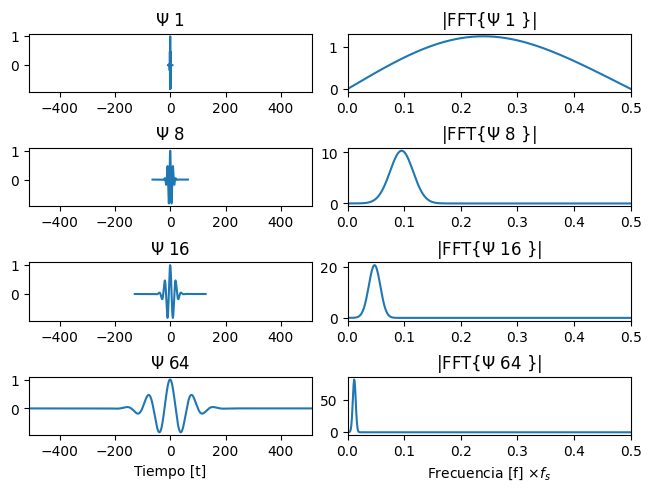

In [6]:
# Ejemplo 9.5 Interpretación en frecuencia de cada escala de la CWT
#
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft
import pywt

# Calcula la función wavelet madre en cada escala (Asume wavelet Morlet)
wavname = 'morl'
w_morl  = pywt.ContinuousWavelet(wavname)
[phi1, x1] = w_morl.wavefun(level=10)

scales = [1, 8, 16, 64] 
minx = np.min(x1) * np.max(scales)
maxx = np.max(x1) * np.max(scales)

def scaleWavelet(phi, x, scale):
    psi_s = sig.resample(phi, int(len(phi)*scale))
    x_s = np.linspace(np.min(x)*scale,np.max(x)*scale, len(psi_s))
    return psi_s, x_s

def freqResponseWavelet(wavname, scale):
    # Calcula los coeficientes de los filtros usando las mismas instrucciones de como lo hace internamente CWT
    # (Para más información consultar https://pywavelets.readthedocs.io/en/latest/ref/cwt.html)
    int_psi, x = pywt.integrate_wavelet(wavname, precision=10)
    step = x[1] - x[0]
    width = np.max(x)-np.min(x)
    max_len = int(np.max(scales)*width + 1)

    j = np.floor(np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where(j >= np.size(int_psi))[0])
    j = j.astype(np.int_)

    # Normaliza int_psi
    int_psi /= np.abs(int_psi).max()
    # Muestras discretas de la integral de la wavelet
    filt = int_psi[j][::-1]
    return fft(filt, n=max_len)

# Grafica la forma de las funciones madre y sus respuestas en frecuencia
fig, axs = plt.subplots(len(scales),2,layout='constrained')

for n, scale in enumerate(scales):
    psi_s, x_s = scaleWavelet(phi1, x1, scale)
    psi_s_k = freqResponseWavelet(wavname, scale)
    # Grafica la forma de las función madre a la escala s 
    axs[n,0].plot(x_s, psi_s)
    axs[n,0].set_title(rf"$\Psi$ {scale}")
    axs[n,0].set(xlim=(minx,maxx))
    if (n==len(scales)-1): axs[n,0].set_xlabel("Tiempo [t]")
    #Grafica el espectro de la escala
    Phi_k = fft(psi_s_k)
    f = np.linspace(0,1,len(psi_s_k))
    axs[n,1].plot(f, np.abs(psi_s_k))
    axs[n,1].set_title(rf"|FFT{{$\Psi$ {scale} }}|")
    axs[n,1].set(xlim=(0,0.5))
    if (n==len(scales)-1): axs[n,1].set_xlabel(r"Frecuencia [f] $\times f_{s}$")

#### Para Reflexionar

* La CWT se puede calcular fácilmente con un banco de filtros. ¿Se puede emplear la convolución rápida para implementar la CWT?